<a href="https://colab.research.google.com/github/th4tkh13m/is_john_lennon/blob/main/nbs/IsLennon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [ ]:
%pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('john lennon beatles photos', max_images=1)
urls[0]

Searching for 'john lennon beatles photos'


'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/the-beatles-1964-us-tour-john-lennon-popperfoto.jpg'

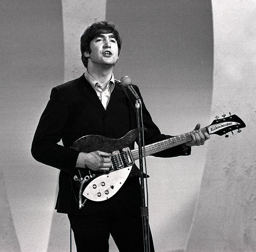

In [ ]:
from fastdownload import download_url
dest = 'lennon.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'human photos'


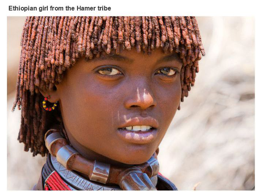

In [ ]:
download_url(search_images('human photos', max_images=1)[0], 'human.jpg', show_progress=False)
Image.open('human.jpg').to_thumb(256,256)

In [ ]:
searches = 'john lennon','human'
path = Path('lennon_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'), max_pics=5000)
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} young photo'), max_pics=5000)
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'john lennon photo'
Searching for 'john lennon young photo'
Searching for 'human photo'
Searching for 'human young photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

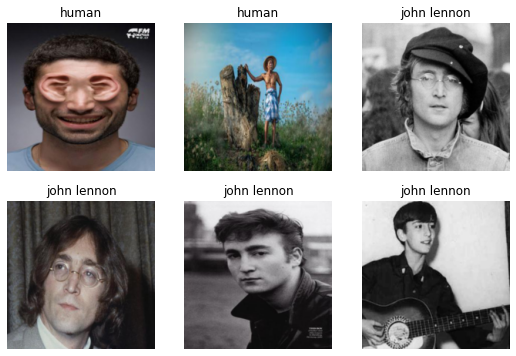

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn.lr_find()

FileNotFoundError: ignored

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.440743,2.173882,0.428571,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.787071,1.651964,0.380952,00:01
1,0.522229,0.869460,0.380952,00:00
2,0.409713,0.409648,0.095238,00:00
3,0.326279,0.345315,0.095238,00:00


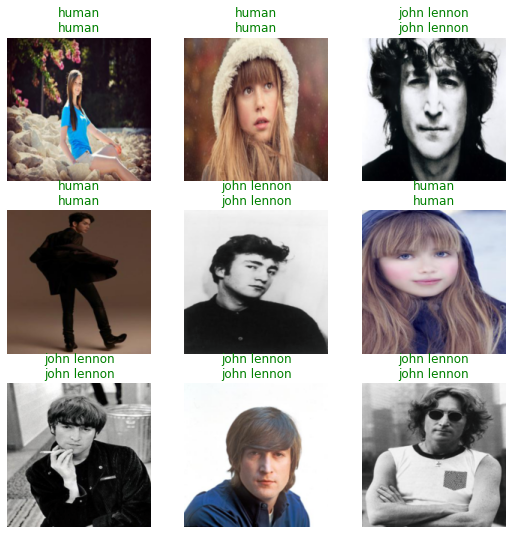

In [ ]:
learn.show_results()

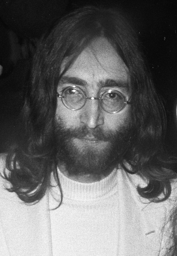

This is: john lennon.
Probability it's Lennon: 0.9997


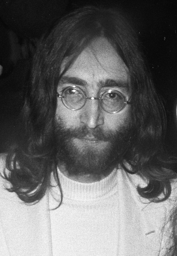

In [ ]:
is_lennon,_,probs = learn.predict(PILImage.create('John_Lennon_1969_(cropped).jpg'))
print(f"This is: {is_lennon}.")
print(f"Probability it's Lennon: {probs[1]:.4f}")
Image.open('John_Lennon_1969_(cropped).jpg').to_thumb(256,256)

This is: john lennon.
Probability it's Lennon: 0.6845


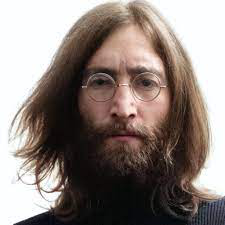

In [ ]:
is_lennon,_,probs = learn.predict(PILImage.create('index.jpg'))
print(f"This is: {is_lennon}.")
print(f"Probability it's Lennon: {probs[1]:.4f}")
Image.open('index.jpg').to_thumb(256,256)

This is: human.
Probability it's Lennon: 0.0467


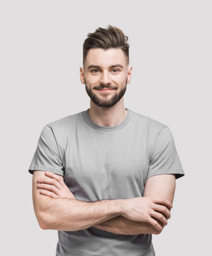

In [ ]:
is_lennon,_,probs = learn.predict(PILImage.create('istockphoto-1200677760-612x612.jpg'))
print(f"This is: {is_lennon}.")
print(f"Probability it's Lennon: {probs[1]:.4f}")
Image.open('istockphoto-1200677760-612x612.jpg').to_thumb(256,256)

This is: human.
Probability it's Lennon: 0.1081


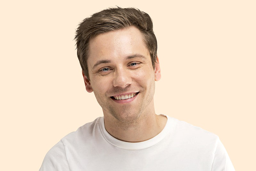

In [ ]:
is_lennon,_,probs = learn.predict(PILImage.create('man.jpg'))
print(f"This is: {is_lennon}.")
print(f"Probability it's Lennon: {probs[1]:.4f}")
Image.open('man.jpg').to_thumb(256,256)

In [ ]:
learn.export("is_lennon.pkl")